In [1]:
%config InlineBackend.figure_format = 'retina'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from ripple.waveforms.IMRPhenomD import gen_IMRPhenomD_polar
from ripple import ms_to_Mc_eta
import jax.numpy as jnp
from likelihood.detector_preset import * 
from likelihood.detector_projection import * 

In [42]:
# define center of time array
tgps_geo = 1126259462.423

# define sampling rate and duration
fsamp = 8192
duration = 8

delta_t = 1/fsamp
tlen = int(round(duration / delta_t))
freqs = np.fft.rfftfreq(tlen, delta_t)
delta_f = freqs[1] - freqs[0]

In [43]:
# Now lets compute the waveform ripple
m1 = 20.0
m2 = 10.0
Mc, eta = ms_to_Mc_eta(jnp.array([m1, m2]))
chi1 = 0.0
chi2 = 0.0
D = 100.0
tc = 0.01
phic = 0.0
inclination = np.pi
psi = np.pi
ra = 0.3
dec = 0.7
fmin = 30

f_list = freqs[freqs>fmin]

In [44]:
def get_detector_response_ripple(flist, params_dict, detector_presets):
    wvf_keys = ['Mc', 'eta', 'chi1', 'chi2', 'D', 't_c', 'phic', 'inclination']
    wvf_params = jnp.array([params[key] for key in wvf_keys])
    hp, hc = gen_IMRPhenomD_polar(f_list, wvf_params)
    waveform = {'plus':hp, "cross":hc}
    
    projection_keys = ['ra', 'dec', 't_c', 'psi']
    detector_params = {key: params_dict[key] for key in projection_keys}
    detector_params['geocent_time'] = 0.0
    detector_params['start_time'] = 0.0
    
    data_dict = {}
    for key in detector_presets.keys():
        detector, detector_vertex = detector_presets[key]
        data_dict[key] = get_detector_response(f_list, waveform, parameters, detector, detector_vertex)
    return data_dict

params = {'Mc': Mc, 'eta': eta, 'chi1': chi1, 'chi2': chi2, 'D': D, 't_c': tc, 'phic': phic, 'inclination': inclination, 'psi': psi, 'ra': ra, 'dec': dec}
detector_presets = {'H1': get_H1(), 'L1': get_L1()}

data = get_detector_response_ripple(f_list, params, detector_presets)

print(data['H1'])
print(data['L1'])

[-5.29826311e-24-4.95005305e-23j  3.22076049e-23-3.76291543e-23j
  4.91976532e-23-2.85183244e-24j ...  1.92021221e-39+1.00620531e-38j
  2.03530785e-39+1.00295562e-38j  2.14990934e-39+9.99575343e-39j]
[-3.76202819e-23+3.73369622e-23j -5.26987590e-23-1.93221853e-24j
 -3.48110951e-23-3.92560237e-23j ...  8.66494355e-39+6.62294792e-39j
  8.70894738e-39+6.54789091e-39j  8.75231415e-39+6.47255851e-39j]


/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


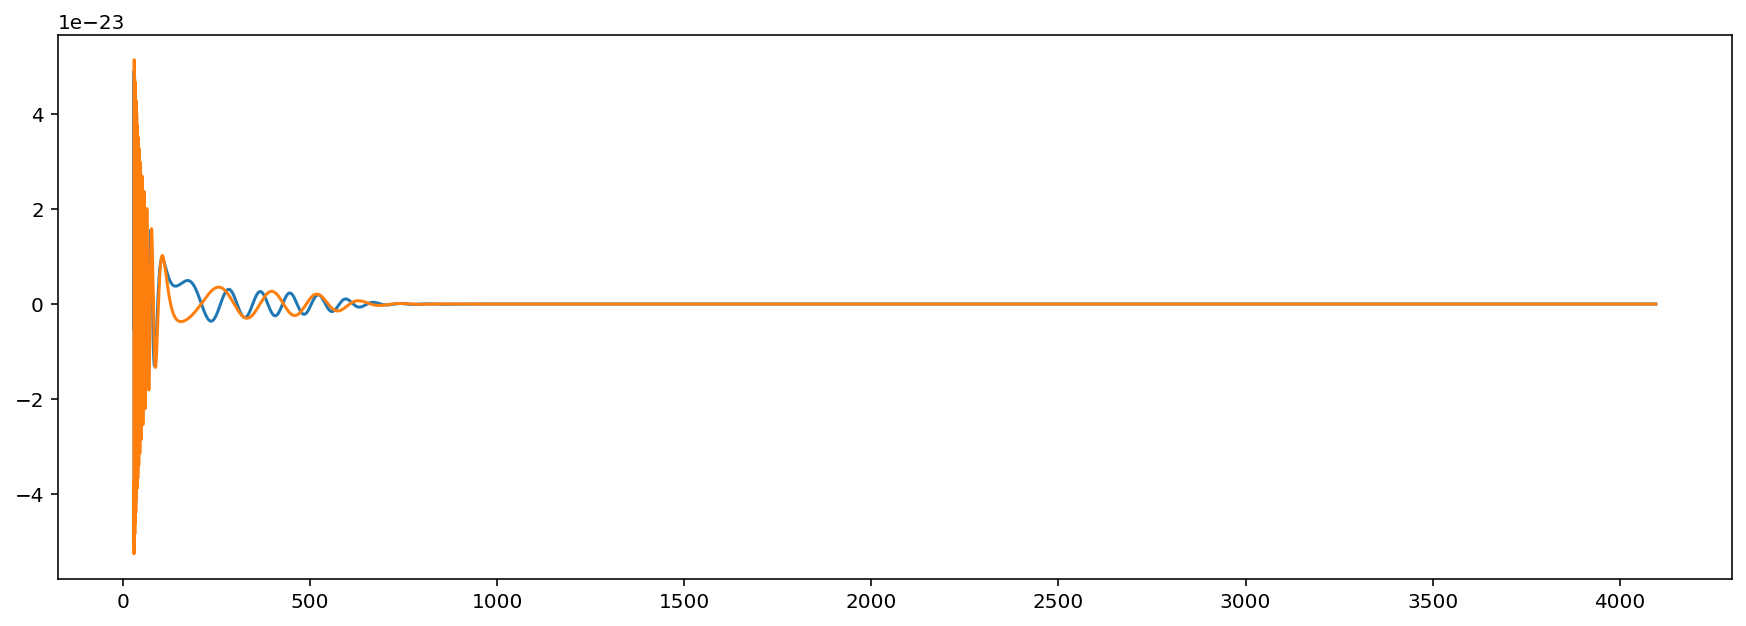

In [46]:
plt.figure(figsize=(15,5))
plt.plot(f_list, data['H1'])
plt.plot(f_list, data['L1'])